C:\Users\gavin\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\gavin\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\gavin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:17: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
C:\Users\gavin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)
C:\Users\gavin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:22: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(was

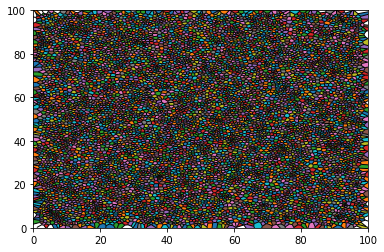

In [80]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib
from matplotlib.collections import PatchCollection
import math
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

def generate_voronoi(count):
    a = np.random.uniform(0,100,count)
    b = np.random.uniform(0,100,count)
    points = np.column_stack((a,b))
    vor = Voronoi(points)
    return vor

def smooth(vor, iterations=0):
    newPoints = []
    for region in vor.regions:
        points = []
        for idx in region:
            vert = vor.vertices[idx]
            points.append(vert)
        avg = np.mean(points, axis=0)
        if not np.isnan(avg).any():
            if avg[0] < 100 and avg[0] > 0 and avg[1] < 100 and avg[1] > 0:
                newPoints.append(avg)
    if iterations > 0:
        return smooth(Voronoi(np.vstack(newPoints)), iterations-1)
    return Voronoi(np.vstack(newPoints))
           


vor = generate_voronoi(10000)
vor = smooth(vor,1)
voronoi_plot_2d(vor, show_points=False, show_vertices=False)
plt.ylim((0,100))
plt.xlim((0,100))
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))
plt.show()

In [ ]:
import random
class Node:
    def __init__(self, idx):
        self.idx = idx
        self.neighbours = set([])
        self.height = 0
    def addEdge(self, neighbour):
        self.neighbours.add(neighbour)

def create_graph(vor):
    graph = {}
    for edge in vor.ridge_points:
        a = edge[0]
        b = edge[1]
        if a not in graph:
            graph[a] = Node(a)
        if b not in graph:
            graph[b] = Node(b)
        graph[a].addEdge(graph[b])
        graph[b].addEdge(graph[a])
    return graph

visited = set([])
queue = []
def create_mountain(vor, decrement, graph, sharpness):
    visited.clear()
    start = random.choice(list(graph.keys()))
    graph[start].height = 1.0
    visited.add(graph[start])
    queue.append(graph[start])
    create_slope(vor, decrement, graph[start], sharpness)
    
def create_slope(vor, decrement, node, sharpness):
    while len(queue) > 0:
        current = queue.pop(0)
        if current.height > 0.01:
            for neighbour in current.neighbours:
                if neighbour not in visited:
                    neighbour.height = current.height * decrement * sharpness
                    visited.add(neighbour)
                    queue.append(neighbour)

graph = create_graph(vor)
for i in range(0,5):
    create_mountain(vor, 0.8, graph, 0.99)

voronoi_plot_2d(vor, show_points=False, show_vertices=False)
plt.ylim((0,100))
plt.xlim((0,100))
white = ((255, 255, 255, 255))
for key in graph.keys():
    node = graph[key]
    region = vor.regions[vor.point_region[node.idx]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        col = ((node.height,node.height,node.height))
        plt.fill(*zip(*polygon), color=col)
plt.show()

C:\Users\gavin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:17: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
C:\Users\gavin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)
C:\Users\gavin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:22: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(was_held)
